# Setup

#### Load Packages

In [1]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

# import packages
import numpy as np
import matplotlib.pyplot as plt

# import modules
import Bargaining as brg
from figures import *
from checks import *

#### Compile C++ files

In [2]:
# compile c++ files
model = brg.HouseholdModelClass(par={'do_cpp':True,'num_Ctot':100})
try:
    model.link_to_cpp(force_compile=True)
except:
    model.cpp.delink()
    model.link_to_cpp(force_compile=True)

## Model Settings

#### Specify Models

In [3]:
# Default settings
T = 3
do_load = False
do_save = False
threads = 16

# Model settings
specs = {
       'VFI':    
              {'latexname':'', 
              'load': do_load,
              'save': do_save,
              'par':{'T':T,
                     'do_cpp':True,
                     'threads':threads,
                     
                     'div_A_share':0.3,
                     'sigma_love':0.0,
                     'do_egm':False,
                     }
              },

       'EGM':    
              {'latexname':'', 
              'load': do_load,
              'save': do_save,
              'par':{'T':T,
                     'do_cpp':True,
                     'threads':threads,
                     
                     'div_A_share':0.3,
                     'sigma_love':0.0,
                     'do_egm':True,
                     }
              },
}

In [4]:
# get the first variable of specs
name = list(specs.keys())[0]

In [5]:
# Make table
print_specs_table(specs)

           |    VFI    |    EGM    |
------------------------------------
T          |     3     |     3     |
div_A_share|    0.3    |    0.3    |
do_cpp     |    True   |    True   |
do_egm     |   False   |    True   |
sigma_love |    0.0    |    0.0    |
threads    |     16    |     16    |


#### Solve/Load models

In [6]:
# solve different models
models = {}
for name,spec in specs.items():
        #unpack
        par = spec['par']
        do_load = spec['load']
        do_save = spec['save']
        
        if do_load:
            print(f'loading {name}...')
        else:
            print(f'solving {name}...')
        
        # setup model
        models[name] = brg.HouseholdModelClass(name=name, par=spec['par'], load=do_load)
        models[name].spec = spec
        
        # link to cpp
        try:
            models[name].link_to_cpp(force_compile=False)
        except:
            models[name].cpp.delink()
            models[name].link_to_cpp(force_compile=False)
        
        # solve
        if not do_load:
            models[name].solve()
        
        # save model
        if do_save:
            models[name].save()
        
# Save model names
model_names  = list(models.keys())

solving VFI...
solving EGM...


# Timing

In [7]:
for name in model_names:
    solution_time = models[name].sol.solution_time
    minutes, seconds = divmod(solution_time, 60)
    seconds, ms      = divmod(seconds*100, 100)
    print(f"{name:16}: {int(minutes):2} minutes, {int(seconds):2} seconds, {int(ms):2} ms")


VFI             :  0 minutes,  0 seconds, 80 ms
EGM             :  0 minutes,  1 seconds, 59 ms


## Check values

In [8]:
#models['EGM'].sol.Mw_single_pd
models['EGM'].sol.C_totw_single_pd.shape


(100,)

In [9]:
# print_namespace(models['EGM'].par)

In [10]:
print_namespace(models['EGM'].sol)

Vw_single               : [[-1.6733479  -1.6709135  -1.66847037 -1.66601878 -1.66358201 -1.66113666
  -1.65868331 -1.65624078 -1.65379003 -1.65133257 -1.64887915 -1.64641922
  -1.64395256 -1.64148441 -1.63901122 -1.63653092 -1.63404323 -1.63155077
  -1.62905079 -1.62654034 -1.62402078 -1.62149305 -1.61895444 -1.61640252
  -1.61383329 -1.61126063 -1.60866808 -1.60605506 -1.60342935 -1.60078389
  -1.59811569 -1.59542383 -1.59270647 -1.58996117 -1.58719035 -1.58438377
  -1.58153764 -1.57865222 -1.57572275 -1.57274058 -1.56970407 -1.56660041
  -1.56341899 -1.5601503  -1.55677655 -1.5532722  -1.54961077 -1.5457358
  -1.54155476 -1.53685841]
 [-1.13196932 -1.1295388  -1.12710322 -1.12469175 -1.12227577 -1.11988132
  -1.11748375 -1.11510365 -1.11272209 -1.11035471 -1.10798749 -1.10562988
  -1.10327534 -1.10092521 -1.09858074 -1.09623577 -1.09389929 -1.09155596
  -1.08922546 -1.08688599 -1.08455372 -1.08221608 -1.07987739 -1.07753861
  -1.07519015 -1.07284621 -1.07048943 -1.06813021 -1.0657624

In [11]:
t=1

variable = models['EGM'].sol.Vw_single[t]

for var in enumerate(variable):
    print(var)

(0, -1.1319693248329599)
(1, -1.129538804141355)
(2, -1.127103215950473)
(3, -1.124691754614593)
(4, -1.1222757719047185)
(5, -1.1198813223733077)
(6, -1.1174837524859447)
(7, -1.115103650772453)
(8, -1.1127220859811222)
(9, -1.1103547109839829)
(10, -1.107987489576327)
(11, -1.1056298799409552)
(12, -1.1032753373545408)
(13, -1.1009252075414258)
(14, -1.0985807395382947)
(15, -1.0962357713293307)
(16, -1.0938992894257205)
(17, -1.091555955310293)
(18, -1.089225460830153)
(19, -1.08688599274742)
(20, -1.084553722685575)
(21, -1.0822160762017823)
(22, -1.0798773890744093)
(23, -1.077538607023599)
(24, -1.0751901517472056)
(25, -1.07284621023524)
(26, -1.0704894276478971)
(27, -1.0681302113451618)
(28, -1.0657624793814915)
(29, -1.063381091593294)
(30, -1.0609968315958795)
(31, -1.0585943782736094)
(32, -1.0561794473045176)
(33, -1.053750908772349)
(34, -1.0512988974869626)
(35, -1.0488309825571545)
(36, -1.0463390651849114)
(37, -1.0438160038283468)
(38, -1.0412665964457837)
(39, -1.038

In [12]:
variable = models['EGM'].par.grid_Aw

for var in enumerate(variable):
    print(var[0], var[1]*1.03 + 1)

0 1.0
1 1.0213654869633417
2 1.042918869675742
3 1.0646651882846312
4 1.086609720993372
5 1.1087580005054396
6 1.1311158319843575
7 1.1536893127059926
8 1.1764848536048849
9 1.199509202945638
10 1.2227694723847964
11 1.2462731657291497
12 1.270028210744297
13 1.2940429944241154
14 1.3183264021994965
15 1.3428878616457642
16 1.3677373913456543
17 1.3928856556825253
18 1.418344026481562
19 1.4441246525915066
20 1.4702405387141824
21 1.4967056350545254
22 1.5235349396941182
23 1.5507446160050984
24 1.578352127943751
25 1.6063763967278981
26 1.6348379832553817
27 1.6637593017259573
28 1.693164871374388
29 1.7230816151335562
30 1.7535392166024995
31 1.7845705501565174
32 1.816212203791216
33 1.8485051209216663
34 1.8814953967563128
35 1.9152352784383742
36 1.9497844381581695
37 1.985211618632615
38 2.021596797113462
39 2.0590340887185454
40 2.0976357331629827
41 2.137537720967035
42 2.178907997538197
43 2.221958913644384
44 2.26696708690635
45 2.314307190644625
46 2.3645146294277968
47 2.41

In [13]:
variable = models['EGM'].sol.Cw_tot_single[t]

for var in enumerate(variable):
    print(var)

(0, 1.0002890622848686)
(1, 1.0112280826109903)
(2, 1.0222633046020528)
(3, 1.0333973087878274)
(4, 1.0444090994616815)
(5, 1.0555090016566795)
(6, 1.0667248832125678)
(7, 1.0783107205954874)
(8, 1.0900105303486698)
(9, 1.1017862823989786)
(10, 1.1134168167290435)
(11, 1.1251690671937185)
(12, 1.1371738972045256)
(13, 1.1495230387184268)
(14, 1.1620103150168994)
(15, 1.1744169446291515)
(16, 1.1868208723073936)
(17, 1.1993739168050226)
(18, 1.2124777908210382)
(19, 1.225754216673152)
(20, 1.2390638908777278)
(21, 1.2522925727373717)
(22, 1.2657033055391111)
(23, 1.2796469892163853)
(24, 1.2938457437235273)
(25, 1.308112449451984)
(26, 1.32237293056472)
(27, 1.3368829383895164)
(28, 1.3519735993746833)
(29, 1.3673265900919978)
(30, 1.3827052325437847)
(31, 1.3982827172044934)
(32, 1.4143471497123192)
(33, 1.4308911532215807)
(34, 1.447664824622891)
(35, 1.4646268462447996)
(36, 1.482112571472156)
(37, 1.5002385307821628)
(38, 1.5187308077192563)
(39, 1.5375721434980991)
(40, 1.557169091

# Figures

#### User settings

In [14]:
# Choose index
t  = 1
iP = 10
iL = 20
iA = 10
idx = (t,iP,iL,iA)

## Bargaining

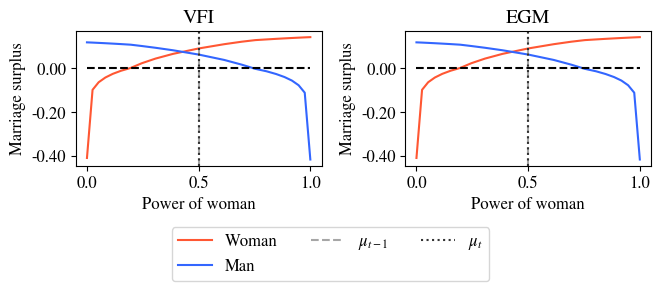

In [15]:
model_plot(models,plot_surplus,t,iP,iL,iA, shared_legend=True, subtitles=model_names)

### Values

Plot female values

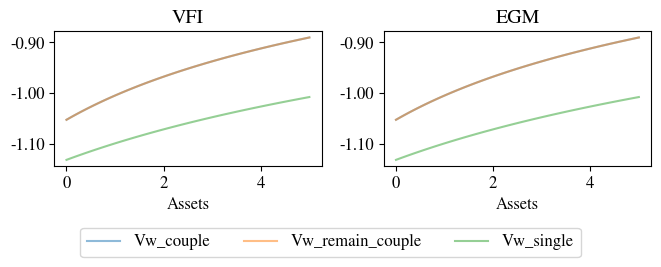

In [16]:
model_plot(models, plot_var_over_assets, ['Vw_couple','Vw_remain_couple','Vw_single'], idx, shared_legend=True, grid_points=False, subtitles=model_names)

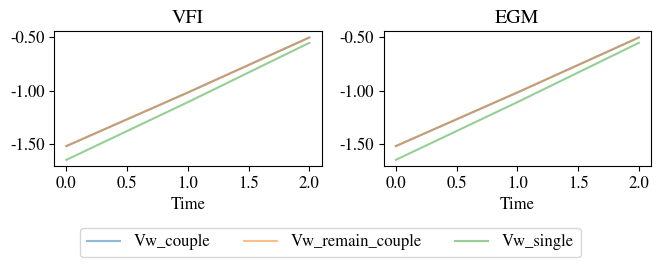

In [17]:
model_plot(models, plot_var_over_time, ['Vw_couple','Vw_remain_couple','Vw_single'], idx, shared_legend=True, subtitles=model_names)

Plot male values

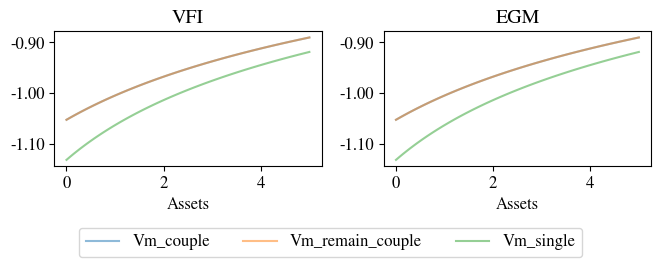

In [18]:
model_plot(models, plot_var_over_assets, ['Vm_couple','Vm_remain_couple','Vm_single'], idx, shared_legend=True, grid_points=False, subtitles=model_names)

### Consumption

Plot female consumption

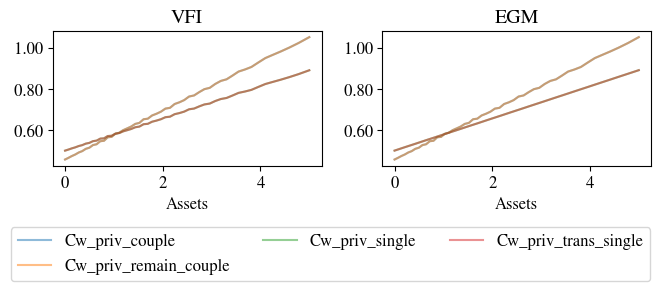

In [19]:
model_plot(models, plot_var_over_assets, ['Cw_priv_couple','Cw_priv_remain_couple','Cw_priv_single', 'Cw_priv_trans_single'], idx, shared_legend=True, grid_points=False, subtitles=model_names)

Plot male consumption

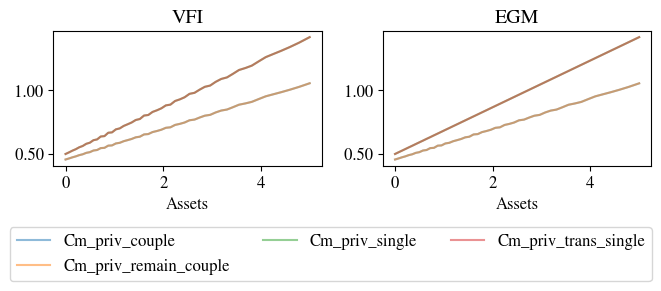

In [20]:
model_plot(models, plot_var_over_assets, ['Cm_priv_couple','Cm_priv_remain_couple','Cm_priv_single', 'Cm_priv_trans_single'], idx, shared_legend=True, grid_points=False, subtitles=model_names)

Plot public consumption

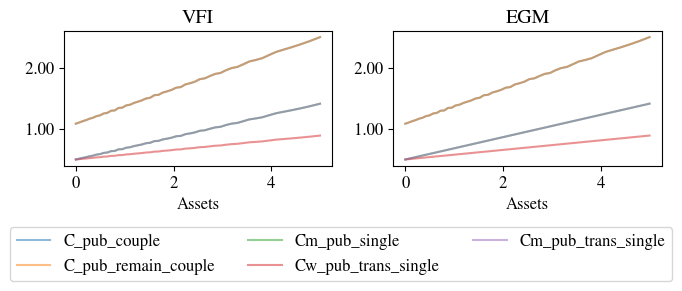

In [21]:
model_plot(models, plot_var_over_assets, ['C_pub_couple','C_pub_remain_couple','Cm_pub_single', 'Cw_pub_trans_single', 'Cm_pub_trans_single', ], idx, shared_legend=True, grid_points=False, subtitles=model_names)

# Focus on 2 models

#### Specify models

In [23]:
model1 = models[list(models.keys())[0]]
model2 = models[list(models.keys())[1]]

## Calculate differences

#### Absolute differences

Absolute differences

In [24]:
sol_max_abs_diff = difference_in_namespace(model1.sol, model2.sol, output='max_abs_value', relative=False)
print_namespace(sol_max_abs_diff)

Variable 'Sw' contains nan values and is skipped
Variable 'Sm' contains nan values and is skipped
Vw_single               : 3.1433794978052987e-06
Vm_single               : 1.2824037048275727e-05
Cw_priv_single          : 0.003549898308376709
Cm_priv_single          : 0.007544589019017778
Cw_pub_single           : 0.003549898308376709
Cm_pub_single           : 0.007544589019017778
Cw_tot_single           : 0.007099796616753418
Cm_tot_single           : 0.015089178038035556
Vw_trans_single         : 3.1433794978052987e-06
Vm_trans_single         : 1.2824037048275727e-05
Cw_priv_trans_single    : 0.003549898308376709
Cm_priv_trans_single    : 0.007544589019017778
Cw_pub_trans_single     : 0.003549898308376709
Cm_pub_trans_single     : 0.007544589019017778
Cw_tot_trans_single     : 0.007099796616753418
Cm_tot_trans_single     : 0.015089178038035556
Vw_couple               : 4.269270109658052e-06
Vm_couple               : 1.2824037050940262e-05
Cw_priv_couple          : 0.00354989830837670

Index of absolute differences

In [25]:
sol_max_abs_diff_index = difference_in_namespace(model1.sol, model2.sol, output='max_abs_index', relative=False)
print_namespace(sol_max_abs_diff_index)

Multiple indices for variable: Vw_couple. Return nan
Multiple indices for variable: Cw_priv_couple. Return nan
Multiple indices for variable: Cm_priv_couple. Return nan
Multiple indices for variable: C_pub_couple. Return nan
Multiple indices for variable: C_tot_couple. Return nan
Multiple indices for variable: Vw_remain_couple. Return nan
Multiple indices for variable: Cm_priv_remain_couple. Return nan
Variable 'Sw' contains nan values and is skipped
Variable 'Sm' contains nan values and is skipped
Multiple indices for variable: power_idx. Return nan
Multiple indices for variable: power. Return nan
Multiple indices for variable: marg_V_couple. Return nan
Multiple indices for variable: marg_V_remain_couple. Return nan
Multiple indices for variable: EmargU_pd. Return nan
Multiple indices for variable: C_tot_pd. Return nan
Multiple indices for variable: M_pd. Return nan
Multiple indices for variable: marg_Vw_single. Return nan
Multiple indices for variable: marg_Vm_single. Return nan
Mult

#### Relative differences

Relative differences

In [26]:
sol_max_rel_diff = difference_in_namespace(model1.sol, model2.sol, output='max_abs_value', relative=True)
print_namespace(sol_max_rel_diff)

Variable 'Sw' contains nan values and is skipped
Variable 'Sm' contains nan values and is skipped
Vw_single               : 2.100523103419125e-06
Vm_single               : 8.149967501821986e-06
Cw_priv_single          : 0.005231184456038336
Cm_priv_single          : 0.009594286433472135
Cw_pub_single           : 0.005231184456038336
Cm_pub_single           : 0.009594286433472135
Cw_tot_single           : 0.005231184456038336
Cm_tot_single           : 0.009594286433472135
Vw_trans_single         : 2.100523103419125e-06
Vm_trans_single         : 8.149967501821986e-06
Cw_priv_trans_single    : 0.005231184456038336
Cm_priv_trans_single    : 0.009594286433472135
Cw_pub_trans_single     : 0.005231184456038336
Cm_pub_trans_single     : 0.009594286433472135
Cw_tot_trans_single     : 0.005231184456038336
Cm_tot_trans_single     : 0.009594286433472135
Vw_couple               : 3.4311711794429614e-06
Vm_couple               : 8.149967501821986e-06
Cw_priv_couple          : 0.005231184456038336
Cm

c:\Users\zbk883\OneDrive - University of Copenhagen\Documents\projects\household_guide\HouseholdBargainingGuide\checks.py:51: RuntimeWarning: invalid value encountered in divide
  diff = np.where(var1 == 0, np.nan, (var2 - var1)/var1)
c:\Users\zbk883\OneDrive - University of Copenhagen\Documents\projects\household_guide\HouseholdBargainingGuide\checks.py:71: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(np.abs(variable))
c:\Users\zbk883\OneDrive - University of Copenhagen\Documents\projects\household_guide\HouseholdBargainingGuide\checks.py:51: RuntimeWarning: divide by zero encountered in divide
  diff = np.where(var1 == 0, np.nan, (var2 - var1)/var1)


Index of relative differences

In [27]:
sol_max_rel_diff_index = difference_in_namespace(model1.sol, model2.sol, output='max_abs_index', relative=True)
print_namespace(sol_max_rel_diff_index)

Multiple indices for variable: Vw_couple. Return nan
Multiple indices for variable: Vm_couple. Return nan
Multiple indices for variable: Cw_priv_couple. Return nan
Multiple indices for variable: Cm_priv_couple. Return nan
Multiple indices for variable: C_pub_couple. Return nan
Multiple indices for variable: C_tot_couple. Return nan
Multiple indices for variable: Cm_priv_remain_couple. Return nan
Multiple indices for variable: C_pub_remain_couple. Return nan
Multiple indices for variable: C_tot_remain_couple. Return nan
Variable 'Sw' contains nan values and is skipped
Variable 'Sm' contains nan values and is skipped
Multiple indices for variable: power_idx. Return nan
No indices for variable: savings_vec. Return nan
No indices for variable: Vw_plus_vec. Return nan
No indices for variable: Vm_plus_vec. Return nan
No indices for variable: marg_V_couple. Return nan
No indices for variable: marg_V_remain_couple. Return nan
No indices for variable: EmargU_pd. Return nan
No indices for variab

## Find largest difference

Specify the variable that index of maximum absolute difference should be based on

In [28]:
# Specify the variable that index of maximum absolute difference should be based on
variable = 'Vw_couple'

# Specify whether to find the index based on absolute or relative differences
relative = False

Find index with largest difference

In [29]:
sol_max_diff_idx = difference_in_namespace(model1.sol, model2.sol, output='max_abs_index', relative=relative)

Multiple indices for variable: Vw_couple. Return nan
Multiple indices for variable: Cw_priv_couple. Return nan
Multiple indices for variable: Cm_priv_couple. Return nan
Multiple indices for variable: C_pub_couple. Return nan
Multiple indices for variable: C_tot_couple. Return nan
Multiple indices for variable: Vw_remain_couple. Return nan
Multiple indices for variable: Cm_priv_remain_couple. Return nan
Variable 'Sw' contains nan values and is skipped
Variable 'Sm' contains nan values and is skipped
Multiple indices for variable: power_idx. Return nan
Multiple indices for variable: power. Return nan
Multiple indices for variable: marg_V_couple. Return nan
Multiple indices for variable: marg_V_remain_couple. Return nan
Multiple indices for variable: EmargU_pd. Return nan
Multiple indices for variable: C_tot_pd. Return nan
Multiple indices for variable: M_pd. Return nan
Multiple indices for variable: marg_Vw_single. Return nan
Multiple indices for variable: marg_Vm_single. Return nan
Mult

In [30]:
idx = getattr(sol_max_diff_idx,variable)

(t,iP,iL,iA) = idx
print(f't = {t}, iP = {iP}, iL = {iL}, iA = {iA}')

TypeError: cannot unpack non-iterable float object

## Plots of differences

#### Make model with absolute differences

In [ ]:
model_diff =  brg.HouseholdModelClass(name='Model differences')
model_diff.par = model1.par
model_diff.sol = difference_in_namespace(model1.sol, model2.sol)

Variable 'Sw' contains nan values and is skipped
Variable 'Sm' contains nan values and is skipped


Plot value

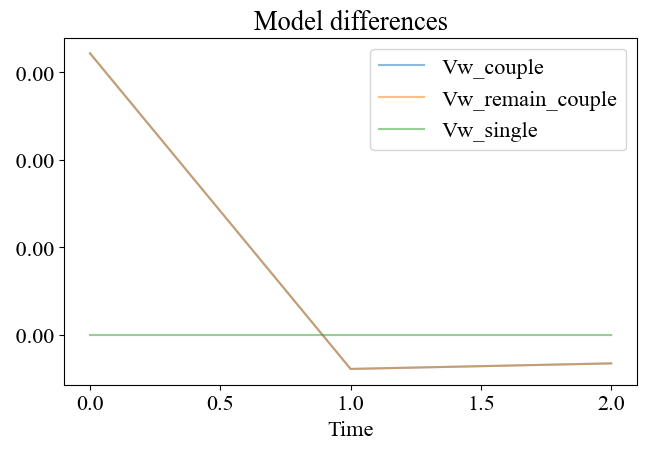

In [ ]:
model_plot([model_diff], plot_var_over_time, ['Vw_couple','Vw_remain_couple','Vw_single'], idx, subtitles=[model_diff.name])

Plot consumption

Text(0.5, 0.5, 'Ctot')

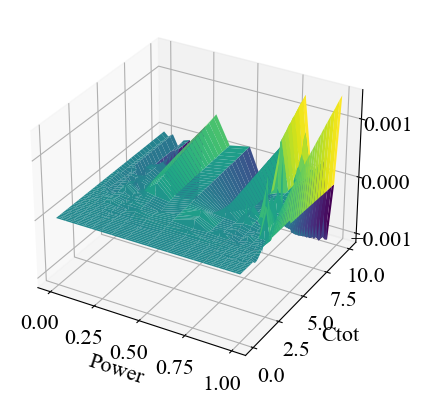

In [ ]:
# plot pre_Ctot_Cw_priv in a 3 dimensional plot with using meshgrids 
fig = plt.figure()
ax = plt.axes(projection='3d')
mesh1, mesh2 = np.meshgrid(model1.par.grid_power, model1.par.grid_Ctot, indexing='ij')

ax.plot_surface(mesh1,mesh2, model_diff.sol.pre_Ctot_Cw_priv, cmap='viridis', edgecolor='none')

# label axes
ax.set_xlabel('Power')
ax.set_ylabel('Ctot')
